<a href="https://colab.research.google.com/github/NeonLabs146/General_stuffs/blob/main/Keras_Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exponentially weighted Moving Average system(EWMA)-Optimizer, KTM weather**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('weather-dataset.csv')
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,18-05-2017 00:00,NaN,73.0,63.0,1.0,27.0,4.0,4.0,285.15,0.0,0.0,90.0,Rain,moderate rain
1,18-05-2017 00:00,NaN,251.0,63.0,1.0,27.0,4.0,4.0,285.15,0.0,0.0,90.0,Mist,mist
2,18-05-2017 00:00,NaN,75.0,56.0,1.0,0.0,1.0,1.0,285.15,0.0,0.0,90.0,Drizzle,light intensity drizzle
3,18-05-2017 01:00,NaN,98.0,56.0,1.0,351.0,2.0,2.0,284.79,0.0,0.0,90.0,Rain,heavy intensity rain
4,18-05-2017 01:00,NaN,283.0,56.0,1.0,351.0,1.0,1.0,284.79,0.0,0.0,90.0,Mist,mist


In [ ]:
df = df[['date_time','temperature']]

In [ ]:
df.head()

,date_time,temperature
0,18-05-2017 00:00,285.15
1,18-05-2017 00:00,285.15
2,18-05-2017 00:00,285.15
3,18-05-2017 01:00,284.79
4,18-05-2017 01:00,284.79


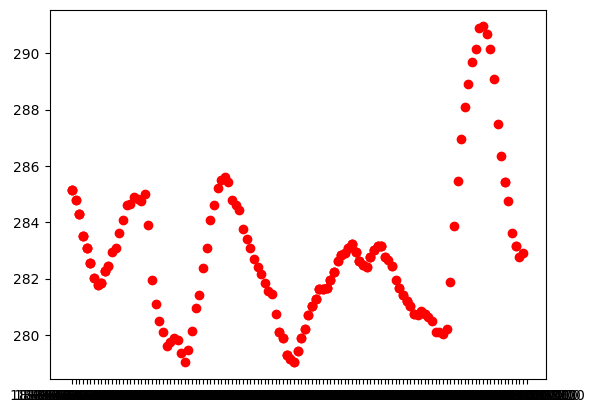

In [ ]:
#plt.scatter(df['date_time'],df['humidity'],color='red')
plt.scatter(df['date_time'].astype(str),df['temperature'],color='red')

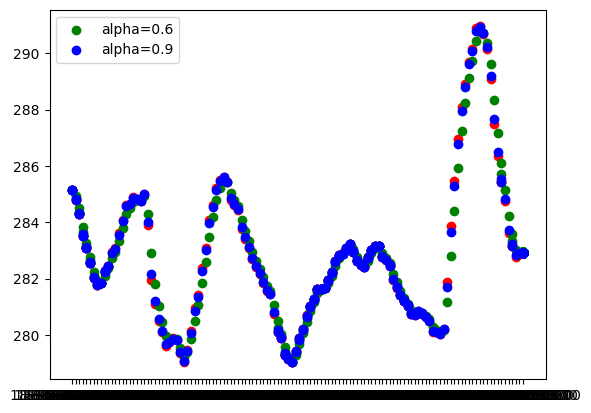

In [ ]:
X1 = df['temperature'].ewm(alpha=0.6).mean()
df['ewma']=X1
plt.scatter(df['date_time'].astype(str),df['temperature'],color='red')
plt.scatter(df['date_time'].astype(str),X1,color='green',label='alpha=0.6')
X2 = df['temperature'].ewm(alpha=0.9).mean()
df['ewma']=X2
plt.scatter(df['date_time'].astype(str),X2,color='blue',label='alpha=0.9')
plt.legend()
plt.show()

##**Keras Hyperparameter Tuning**

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(768, 8)

In [ ]:
model = Sequential()
model.add(Dense(32,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data = (X_test,y_test))

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 6.5159 - accuracy: 0.6254 - val_loss: 2.7491 - val_accuracy: 0.4805
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 2.2427 - accuracy: 0.4837 - val_loss: 1.9164 - val_accuracy: 0.4286
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.4693 - accuracy: 0.6010 - val_loss: 1.3210 - val_accuracy: 0.5714
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 1.2059 - accuracy: 0.6352 - val_loss: 1.1326 - val_accuracy: 0.6299
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0616 - accuracy: 0.6319 - val_loss: 1.0750 - val_accuracy: 0.5909
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.9789 - accuracy: 0.6303 - val_loss: 1.0317 - val_accuracy: 0.5974
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.8843 - accuracy: 0.6450 - val_loss: 1.0240 - val_accuracy: 0.5455
Epoch 8/100


1. how to select appropriate optimizer?
2. number of nodes in a layer.
3. how to select number of hidden layers?
4. All in one model.

In [ ]:
pip install keras_tuner

1. **Selecting the best Optimizer**

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32,input_dim=8,activation='relu'))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer=hp.Choice('optimizer',['adam','sgd','rmsprop','nadam']),metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project',project_name='diabetes')

Reloading Tuner from project/diabetes/tuner0.json


In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 561 (2.19 KB)
Trainable params: 561 (2.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 1s 13ms/step - loss: 0.7399 - accuracy: 0.5961 - val_loss: 0.6577 - val_accuracy: 0.7208
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.6303 - val_loss: 0.6971 - val_accuracy: 0.6818
Epoch 3/5

2.**Finding the number of Nodes in a layer**

In [ ]:
def build_model(hp):
  model = Sequential()
  units = hp.Int('units',min_value=8,max_value=128,step=8)
  model.add(Dense(units = units,input_dim=8,activation='relu'))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics = ['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project',project_name='diabetes_nodes')

Reloading Tuner from project/diabetes_nodes/tuner0.json


In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'units': 120}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               1080      
                                                                 
 dense_1 (Dense)             (None, 8)                 968       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2057 (8.04 KB)
Trainable params: 2057 (8.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 1s 13ms/step - loss: 0.6494 - accuracy: 0.6482 - val_loss: 0.6178 - val_accuracy: 0.6948
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.6612 - val_loss: 0.6146 - val_accuracy: 0.7273
Epoch 3

3.**Selecting no. of Hidden Layers**

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(120,input_dim=8,activation='relu'))
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(Dense(120,activation='relu'))
    #model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics = ['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project',project_name='diabetes_layers')

Reloading Tuner from project/diabetes_layers/tuner0.json


In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 68}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               1080      
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 15721 (61.41 KB)
Trainable params: 15721 (61.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 2s 37ms/step - loss: 1.9207 - accuracy: 0.5863 - val_loss: 2.1495 - val_accuracy: 0.6948
Epoch 2/50
20/20 [==============================] - 0s 15ms/step - loss: 1.7369 - accuracy: 0.5847 - val_loss: 1.8241 - val_accuracy: 0.7338
Ep

4. **All Hyperparameters in one**

In [ ]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int('units'+str(i),
                      min_value = 8,
                      max_value =128,
                      step = 8),
                      activation=hp.Choice('activation'+str(i),values = ['tanh','relu','sigmoid']),input_dim=8,))
      model.add(Dropout(hp.Float('dropout'+str(i),min_value=0.0,max_value=0.5,step=0.1)))
    else:
      model.add(Dense(hp.Int('units'+str(i),min_value = 8,max_value  =128,step = 8),activation=hp.Choice('activation'+str(i),values = ['tanh','relu','sigmoid'])))
      model.add(Dropout(hp.Float('dropout'+str(i),min_value=0.0,max_value=0.5,step=0.1)))
    counter += 1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop','adam','sgd','nadam','adadelta']), loss='binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project',project_name='diabetes_all')

Reloading Tuner from project/diabetes_all/tuner0.json


In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 120,
 'activation0': 'sigmoid',
 'dropout0': 0.1,
 'optimizer': 'adam',
 'units1': 88,
 'activation1': 'tanh',
 'dropout1': 0.30000000000000004,
 'units2': 88,
 'activation2': 'relu',
 'dropout2': 0.4,
 'units3': 64,
 'activation3': 'tanh',
 'dropout3': 0.2,
 'units4': 112,
 'activation4': 'relu',
 'dropout4': 0.30000000000000004,
 'units5': 112,
 'activation5': 'tanh',
 'dropout5': 0.0,
 'units6': 72,
 'activation6': 'sigmoid',
 'dropout6': 0.1,
 'units7': 128,
 'activation7': 'sigmoid',
 'dropout7': 0.4,
 'units8': 40,
 'activation8': 'sigmoid',
 'dropout8': 0.30000000000000004,
 'units9': 120,
 'activation9': 'sigmoid',
 'dropout9': 0.2}

In [ ]:
model= tuner.get_best_models(num_models=1)[0]
model.summary()
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               1080      
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 88)                10648     
                                                                 
 dropout_1 (Dropout)         (None, 88)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 89        
                                                                 
Total params: 11817 (46.16 KB)
Trainable params: 11817 (46.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
20/20 [==